# Data Iris

Veamos ahora un ejemplo de Silhouette con el famoso dataset de IRIS

In [1]:
#Cargamos las librerias
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#Carga del data set 
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
#Creacion de K-Means
km = KMeans(n_clusters=3, random_state=42)
km.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [4]:
#Calculo de Silhouette
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.553


En esta sección del notebook, usaremos YellowBrick una biblioteca de visualización de aprendizaje automático para dibujar las gráficas de silueta y realizar un análisis comparativo para identificar el número óptimo de clústers.

Yellowbrick amplía la API de Scikit-Learn para facilitar la selección del modelo y el ajuste de hiperparámetros. En este ejemplo en particular, generaremos un gráfico de silueta para clústeres de K-medias con n_cluster = 2, 3, 4 y 5.

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


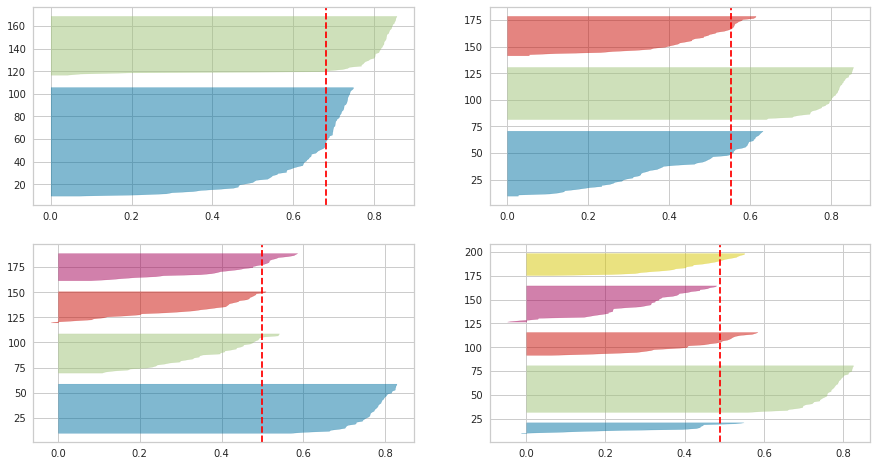

In [5]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8)) #Definimos el tamaño del gráfico
for i in [2, 3, 4, 5]:
    
    #Creando diferentes instancias de kmeans para distinta cantidad de cluster
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    #Visualizamos el índice Silhouette con yellowbrick
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

¿Qué podemos interpretar de la visualización anterior? 

Sin dudas, a medida que agregamos más clústers el índice de Silhouette empeora, por ejemplo con 3 clúster posee un valor inferior a 0.6, caso contrario con dos clúster el valor obtenido supera dicho umbral. 

In [6]:
#Kmeans con k=2
km = KMeans(n_clusters=2, random_state=42)
km.fit_predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [7]:
#Calculo de Silhouette
score = silhouette_score(X, km.labels_, metric='euclidean')
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.681


**Insight**

Efectivamente con k=2 el valor de Silhouette mejora relativamente, tal cual como podíamos observar en la imagen anterior.